# LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERNSHIP"

## LGMVIP July-22

### _Author - Zecil Jain_

### Task 6- Prediction Using Decision Tree Algorithm - Iris Dataset

In this project we will visualize the Iris Dataset and create a Decision Tree Classifier with an aim to predict the right class when any new data is given to it.

We will also visualize the dataset and tree depth to understand the procedure in-depth.

Dataset Link: https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

## Importing the Dataset

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Iris_data contain total 6 features in which 4 features (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalwidthCm) are independent features and 1 feature(Species) is dependent or target variable. And Id column is like serial number for each data points.

All Independent features has not-null float values and target variable has class labels(Iris-setosa, Iris-versicolor, Iris-virginica)

In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
data.shape

(150, 6)

In [9]:
data.value_counts('Species')

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Our Iris data said to be Balanced dataset because each class(Species) has equal number of data points. No Class is fully dominating in our dataset.

## Data Visualization

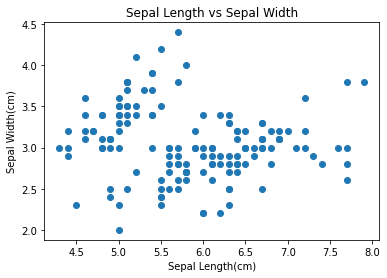

In [10]:
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'])
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Sepal Width(cm)')
plt.title('Sepal Length vs Sepal Width')
plt.show()

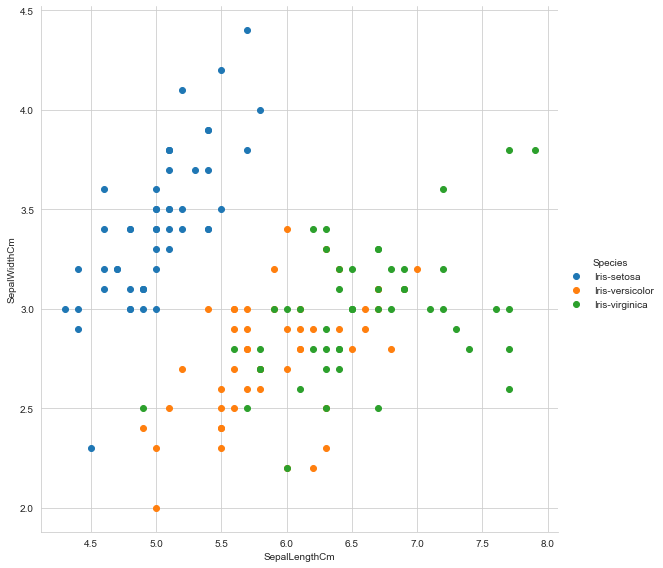

In [11]:
sns.set_style('whitegrid')
sns.FacetGrid(data, hue='Species',height=8).map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend()
plt.show()

By looking the Scatter plot we can say that all bluepoints(Iris-setosa) are separated perfectly as compare to orange(versicolor) or green(virginica) points for features(SepalLengthCm, SepalwidthCm)

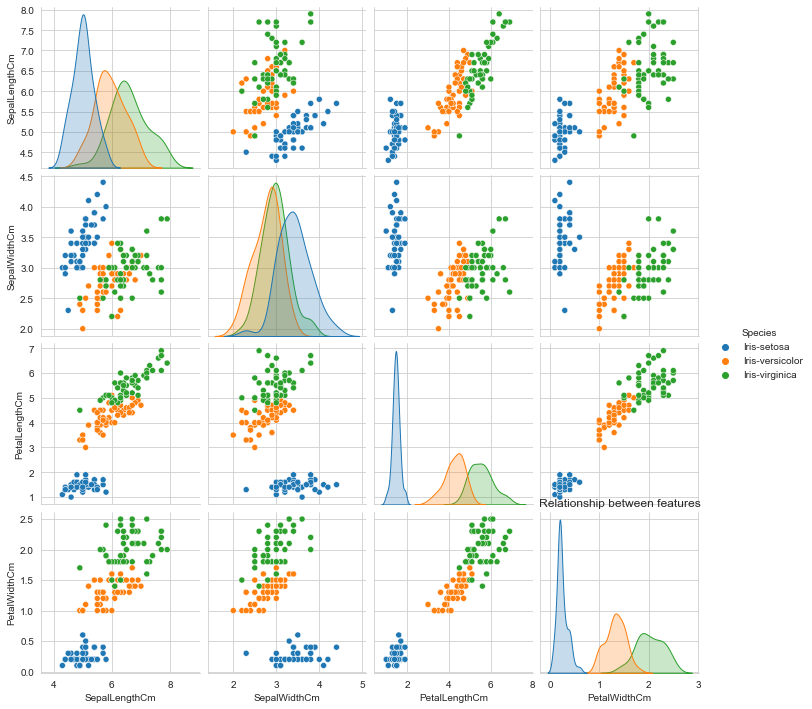

In [12]:
sns.pairplot(data.drop(['Id'], axis=1),hue='Species')
plt.title('Relationship between features')
plt.show()

In pair plot we saw that there are some feature combinations which have very less overlapping b/w Versicolor and Virginica, that means those feature are very important for our classification purpose.

### Exploring new features

In [13]:
data['Sepal_diff'] = data['SepalLengthCm'] - data['SepalWidthCm']
data['Petal_diff'] = data['PetalLengthCm'] - data['PetalWidthCm']

In [14]:
data['Sepal_Petal_len_diff'] = data['SepalLengthCm'] - data['PetalLengthCm']
data['Sepal_Petal_wid_diff'] = data['SepalWidthCm'] - data['PetalWidthCm']

In [15]:
data['Sepal_Petal_len_wid_diff'] = data['SepalLengthCm'] - data['PetalWidthCm']
data['Sepal_Petal_wid_len_diff'] = data['SepalWidthCm'] - data['PetalLengthCm']

In [16]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,Petal_diff,Sepal_Petal_len_diff,Sepal_Petal_wid_diff,Sepal_Petal_len_wid_diff,Sepal_Petal_wid_len_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3,4.9,2.1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8,4.7,1.6
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0,4.5,1.9
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9,4.4,1.6
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4,4.8,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9,1.5,0.7,4.4,-2.2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1,1.3,0.6,4.4,-2.5
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2,1.3,1.0,4.5,-2.2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1,0.8,1.1,3.9,-2.0


### Visualizing new dataset features

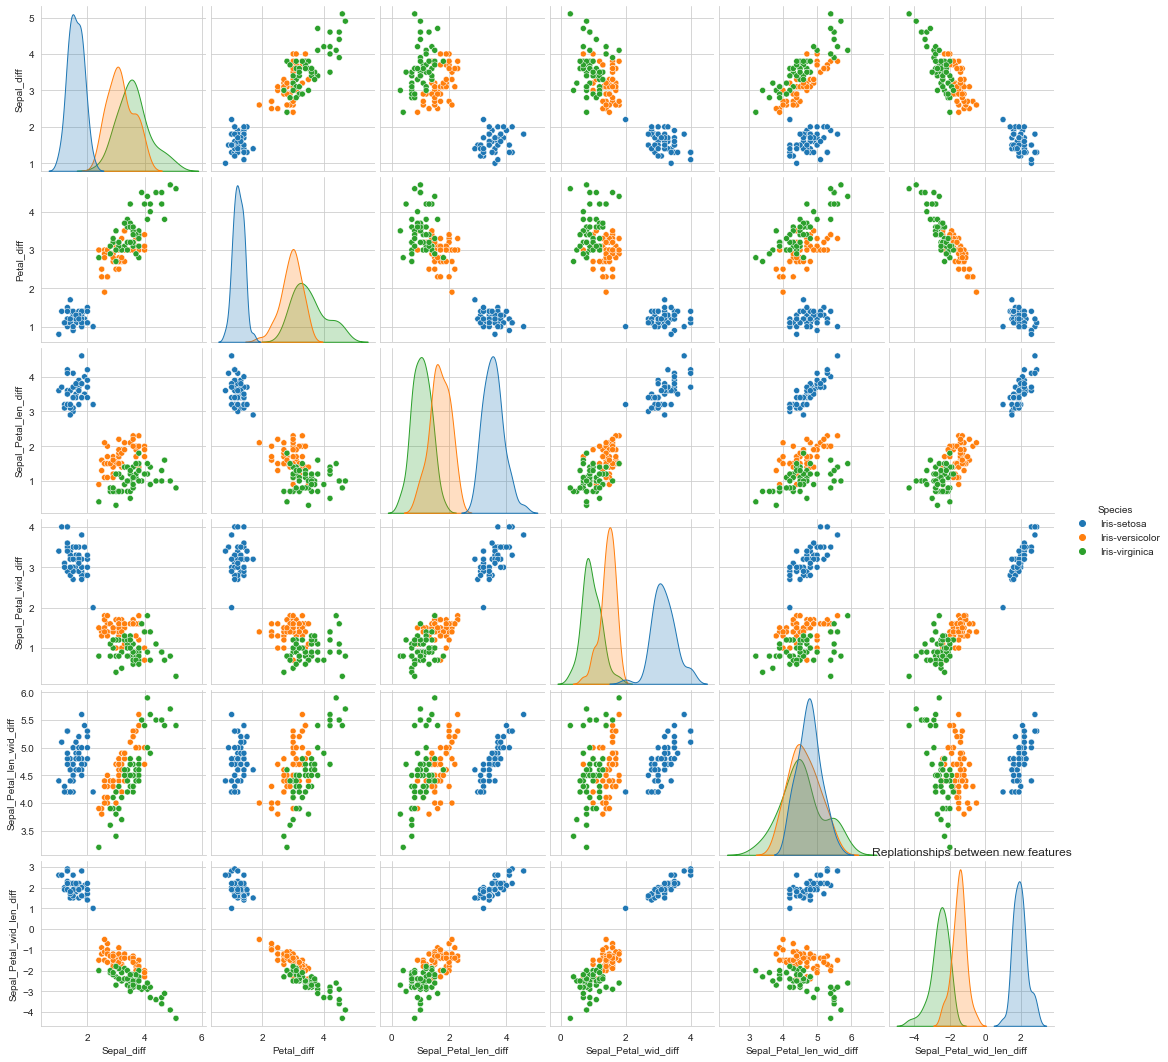

In [17]:
sns.pairplot(data[['Species', 
                   'Sepal_diff',
                   'Petal_diff', 
                   'Sepal_Petal_len_diff', 
                   'Sepal_Petal_wid_diff',
                   'Sepal_Petal_len_wid_diff',
                   'Sepal_Petal_wid_len_diff']],
            hue='Species')
plt.title('Replationships between new features')
plt.show()

The above pairplot with new features just bolsters our previous conclusions drawn.

## Model Building

In [18]:
data.drop(['Id'],axis=1, inplace=True)

In [19]:
target = 'Species'
X = data.drop(columns=[target], axis=1)
y = data[target]
print(f'Shape of feature matrix, X: {X.shape} | shape of target vector, y: {y.shape}')

Shape of feature matrix, X: (150, 10) | shape of target vector, y: (150,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

In [22]:
dtc = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
dtc.fit(X_t, y_t)

DecisionTreeClassifier()

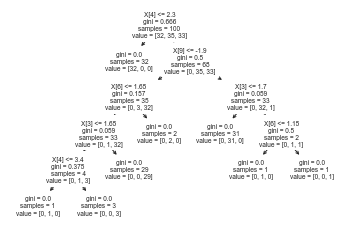

In [23]:
tree.plot_tree(dtc);

### Visualizing DTC using GraphViz library

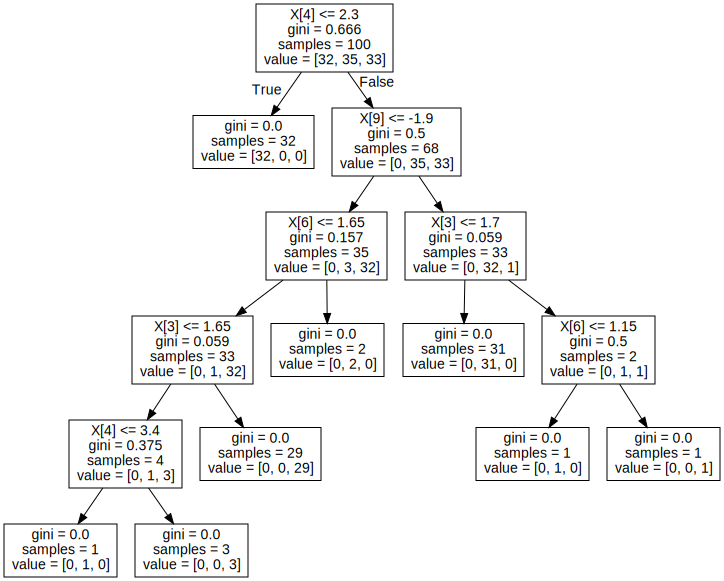

In [24]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

dot_data = tree.export_graphviz(dtc,out_file=None)
graph = graphviz.Source(dot_data)
graph

In [25]:
print("Accuracy score: ", cross_val_score(dtc, X_t, y_t, cv=3,scoring='accuracy').mean())

Accuracy score:  0.9298871063576946


In [26]:
pred = dtc.predict(X_val)
print('Accuracy score for validation test data: ', accuracy_score(y_val, pred))
multilabel_confusion_matrix(y_val, pred)

Accuracy score for validation test data:  0.9166666666666666


array([[[9, 0],
        [0, 3]],

       [[8, 0],
        [1, 3]],

       [[6, 1],
        [0, 5]]], dtype=int64)

- We can see our selected features are working well and model gives very good accuracy score on validate or actual test data.

- So Now we can trained our model on Actual train dataset with selected features for evaluating/ deploying our model in real world cases.

### Training of Actual train dataset

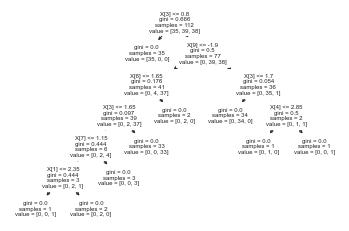

In [27]:
true_dtc = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
true_dtc.fit(X_train, y_train)

tree.plot_tree(true_dtc);

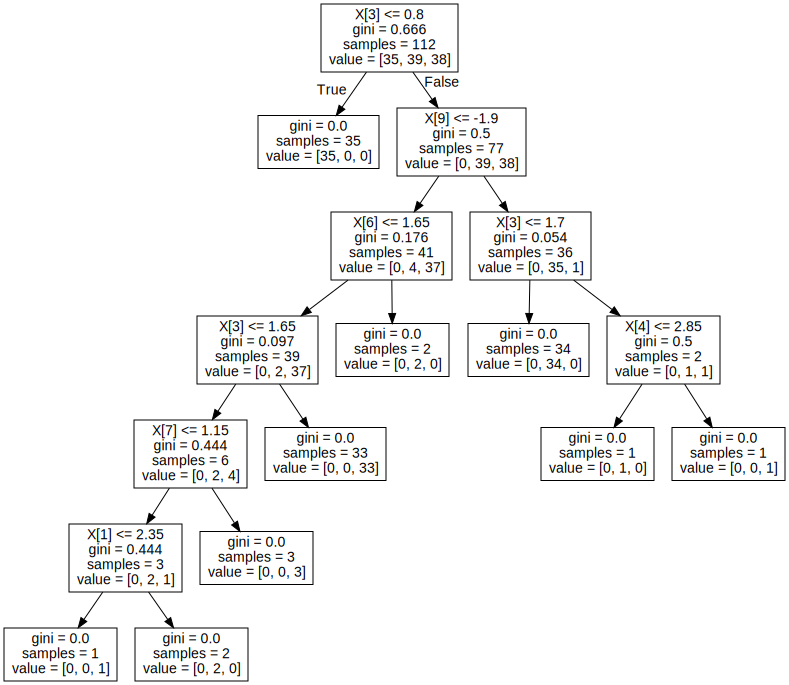

In [28]:
dot_data = tree.export_graphviz(true_dtc, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [29]:
pred = true_dtc.predict(X_test)
pred

print('Model Accuracy score on totally unseen dataset: ',accuracy_score(y_test, pred)*100, '%')
multilabel_confusion_matrix(y_test, pred)

Model Accuracy score on totally unseen dataset:  94.73684210526315 %


array([[[23,  0],
        [ 0, 15]],

       [[26,  1],
        [ 1, 10]],

       [[25,  1],
        [ 1, 11]]], dtype=int64)

- We get an overall accuracy score of 94.73% on our test data. This is a very good score and hence proves the reliability of our model for predicting results in unknown test environments.

- We will now make a test set to see for ourselves how well the model predicts the species based on the input values it gets.

In [30]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,Petal_diff,Sepal_Petal_len_diff,Sepal_Petal_wid_diff,Sepal_Petal_len_wid_diff,Sepal_Petal_wid_len_diff
0,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3,4.9,2.1
1,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8,4.7,1.6
2,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0,4.5,1.9
3,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9,4.4,1.6
4,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4,4.8,2.2
...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9,1.5,0.7,4.4,-2.2
146,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1,1.3,0.6,4.4,-2.5
147,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2,1.3,1.0,4.5,-2.2
148,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1,0.8,1.1,3.9,-2.0


We need to pass 10 input values for each data point for the model to predict accurately. The features corresponding to these 10 values are:
- SepalLengthCm	
- SepalWidthCm	
- PetalLengthCm	
- PetalWidthCm	
- Sepal_diff	
- Petal_diff	
- Sepal_Petal_len_diff	
- Sepal_Petal_wid_diff	
- Sepal_Petal_len_wid_diff	
- Sepal_Petal_wid_len_diff

In [31]:
Test_point = [
    [5.4,3.0,4.5,1.5,2.4,3.0,0.9,1.5,3.9,-1.5],
    [6.5,2.8,4.6,1.5,3.7,3.1,1.9,1.3,5.0,-1.8],
    [5.1,2.5,3.0,1.1,2.6,1.9,2.1,1.4,4.0,-0.5],
    [5.1,3.3,1.7,0.5,1.8,1.2,3.4,2.8,4.6,1.6],
    [6.0,2.7,5.1,1.6,3.3,3.5,0.9,1.1,4.4,-2.4],
    [6.0,2.2,5.0,1.5,3.8,3.5,1.0,0.7,4.5,-2.8]
]
print(true_dtc.predict(Test_point))

['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica']


D:\PYTHON310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


As we can see the model accurately predicts species for all 6 test cases. And hence we have successfully completed our task of predicting classes using decision tree algorithm for the Iris Dataset.